In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
#from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression  as  LR  # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet as ELNET, ElasticNetCV  # Regularization

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV , KFold # (Train - Valid - Test) + hyperparameters tunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
#import roc_auc_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model
## 4) Classification Models
from sklearn.linear_model import LogisticRegression as LGR
from scipy.stats import loguniform, uniform
from sklearn.ensemble import GradientBoostingClassifier
#random_forest
from sklearn.ensemble import RandomForestClassifier as RDF
#KNN
from sklearn.neighbors import KNeighborsClassifier
#SVM
from sklearn.svm import SVC
#Naive Bayes
from sklearn.naive_bayes import GaussianNB as GNB , MultinomialNB, BernoulliNB
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Histogram Gradient Boosting
from sklearn.ensemble import HistGradientBoostingClassifier as HGB
from sklearn.ensemble import HistGradientBoostingRegressor as HGBR


from xgboost import XGBClassifier as XGB
from xgboost import XGBRFRegressor as XGBR
from xgboost import plot_importance
from xgboost import plot_tree


from sklearn import set_config  # force digram to show everything even not in sklearn library
 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn import set_config  # force digram to show everything even not in sklearn library
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,  roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

from warnings import filterwarnings
filterwarnings("ignore")

#Clustring Models
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA


In [2]:
#df = pd.read_csv("../data/raw/Cleaned_Data_Merchant_Level_2.csv")
#df

In [3]:
#df.to_parquet("../data/raw/data.parquet")

Read Data AS Prquet

In [4]:
df=pd.read_parquet('../data/raw/data.parquet')
df

,user_id,dayes_since_last_redeem,redeem_value,dayes_since_redeem,redeem_rank_per_user,redeemed_points,merchant_cat,merchant_id
0,21053,362,2014.0,362,1,20140,Fashion,0
1,26472,368,1120.0,371,1,11200,Fashion,0
2,26472,368,850.0,368,2,8500,Fashion,0
3,27075,34,198.0,558,1,1980,Fashion,0
4,27417,413,240.0,413,1,2400,Fashion,0
...,...,...,...,...,...,...,...,...
43667,26865,27,305.0,27,1,3050,F&B,55
43668,27128,31,312.0,31,1,3120,F&B,55
43669,28814,25,120.0,25,1,1200,F&B,55
43670,29107,2,2.0,2,1,20,Other,56


In [5]:
df.isna().sum()

user_id                    0
dayes_since_last_redeem    0
redeem_value               0
dayes_since_redeem         0
redeem_rank_per_user       0
redeemed_points            0
merchant_cat               0
merchant_id                0
dtype: int64

In [6]:
df.nunique()

user_id                    33457
dayes_since_last_redeem      527
redeem_value                5911
dayes_since_redeem           573
redeem_rank_per_user          17
redeemed_points             5911
merchant_cat                   7
merchant_id                   56
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  43672 non-null  int64  
 1   dayes_since_last_redeem  43672 non-null  int64  
 2   redeem_value             43672 non-null  float64
 3   dayes_since_redeem       43672 non-null  int64  
 4   redeem_rank_per_user     43672 non-null  int64  
 5   redeemed_points          43672 non-null  int64  
 6   merchant_cat             43672 non-null  object 
 7   merchant_id              43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


Feature Engineering 

In [8]:
# Create column of sum of redeem_value per each user_id
df['total_redeem_value'] = df.groupby('user_id')['redeem_value'].transform('sum')

df

,user_id,dayes_since_last_redeem,redeem_value,dayes_since_redeem,redeem_rank_per_user,redeemed_points,merchant_cat,merchant_id,total_redeem_value
0,21053,362,2014.0,362,1,20140,Fashion,0,2014.0
1,26472,368,1120.0,371,1,11200,Fashion,0,1970.0
2,26472,368,850.0,368,2,8500,Fashion,0,1970.0
3,27075,34,198.0,558,1,1980,Fashion,0,900.0
4,27417,413,240.0,413,1,2400,Fashion,0,240.0
...,...,...,...,...,...,...,...,...,...
43667,26865,27,305.0,27,1,3050,F&B,55,733.0
43668,27128,31,312.0,31,1,3120,F&B,55,312.0
43669,28814,25,120.0,25,1,1200,F&B,55,120.0
43670,29107,2,2.0,2,1,20,Other,56,4.0


In [9]:
df['total_redeem_points']=df.groupby('user_id')['redeemed_points'].transform('sum')
df

,user_id,dayes_since_last_redeem,redeem_value,dayes_since_redeem,redeem_rank_per_user,redeemed_points,merchant_cat,merchant_id,total_redeem_value,total_redeem_points
0,21053,362,2014.0,362,1,20140,Fashion,0,2014.0,20140
1,26472,368,1120.0,371,1,11200,Fashion,0,1970.0,19700
2,26472,368,850.0,368,2,8500,Fashion,0,1970.0,19700
3,27075,34,198.0,558,1,1980,Fashion,0,900.0,9000
4,27417,413,240.0,413,1,2400,Fashion,0,240.0,2400
...,...,...,...,...,...,...,...,...,...,...
43667,26865,27,305.0,27,1,3050,F&B,55,733.0,7330
43668,27128,31,312.0,31,1,3120,F&B,55,312.0,3120
43669,28814,25,120.0,25,1,1200,F&B,55,120.0,1200
43670,29107,2,2.0,2,1,20,Other,56,4.0,40


In [10]:
# Create column with the minimum dayes_since_last_redeem per user_id
df['latest_redeem_dayes'] = df.groupby('user_id')['dayes_since_last_redeem'].transform('min')

df

,user_id,dayes_since_last_redeem,redeem_value,dayes_since_redeem,redeem_rank_per_user,redeemed_points,merchant_cat,merchant_id,total_redeem_value,total_redeem_points,latest_redeem_dayes
0,21053,362,2014.0,362,1,20140,Fashion,0,2014.0,20140,362
1,26472,368,1120.0,371,1,11200,Fashion,0,1970.0,19700,368
2,26472,368,850.0,368,2,8500,Fashion,0,1970.0,19700,368
3,27075,34,198.0,558,1,1980,Fashion,0,900.0,9000,34
4,27417,413,240.0,413,1,2400,Fashion,0,240.0,2400,413
...,...,...,...,...,...,...,...,...,...,...,...
43667,26865,27,305.0,27,1,3050,F&B,55,733.0,7330,27
43668,27128,31,312.0,31,1,3120,F&B,55,312.0,3120,31
43669,28814,25,120.0,25,1,1200,F&B,55,120.0,1200,25
43670,29107,2,2.0,2,1,20,Other,56,4.0,40,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  43672 non-null  int64  
 1   dayes_since_last_redeem  43672 non-null  int64  
 2   redeem_value             43672 non-null  float64
 3   dayes_since_redeem       43672 non-null  int64  
 4   redeem_rank_per_user     43672 non-null  int64  
 5   redeemed_points          43672 non-null  int64  
 6   merchant_cat             43672 non-null  object 
 7   merchant_id              43672 non-null  int64  
 8   total_redeem_value       43672 non-null  float64
 9   total_redeem_points      43672 non-null  int64  
 10  latest_redeem_dayes      43672 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 3.7+ MB


In [12]:
#create data frame of features  total_redeem_value , total_redeem_points , latest_redeem_days
features=df[['total_redeem_value','total_redeem_points','latest_redeem_dayes']]


In [13]:
features.to_parquet('featrures.parquet')

In [14]:
features.isna().sum()

total_redeem_value     0
total_redeem_points    0
latest_redeem_dayes    0
dtype: int64

Removing Outliers

In [15]:
import pandas as pd

# 1. Datei laden
df = pd.read_parquet('featrures.parquet')

# 2. Tippfehler korrigieren (optional, aber empfohlen)
df.rename(columns={'latest_redeem_dayes': 'latest_redeem_days'}, inplace=True)

# 3. Spalten festlegen, die auf Ausreißer geprüft werden sollen
columns_to_check = ['total_redeem_value', 'total_redeem_points', 'latest_redeem_days']

# 4. IQR berechnen
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# 5. Grenzen definieren
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 6. Ausreißer entfernen
# Wir behalten nur Zeilen, die innerhalb der Grenzen liegen
df_cleaned = df[~((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).any(axis=1)].copy()

# 7. Ergebnis kontrollieren
print(f"Originale Datensätze: {len(df)}")
print(f"Gereinigte Datensätze: {len(df_cleaned)}")
print(f"Entfernte Ausreißer: {len(df) - len(df_cleaned)}")

# 8. Speichern der sauberen Daten
df_cleaned.to_parquet('features_cleaned.parquet')

Originale Datensätze: 43672
Gereinigte Datensätze: 37453
Entfernte Ausreißer: 6219


In [16]:
features = pd.read_parquet('features_cleaned.parquet')

In [17]:
#check duplicates
features.duplicated().sum()

np.int64(11251)

In [18]:
features=features.drop_duplicates()
features

,total_redeem_value,total_redeem_points,latest_redeem_days
3,900.0,9000,34
4,240.0,2400,413
6,582.0,5820,33
7,472.4,4724,233
8,156.5,1565,14
...,...,...,...
43654,198.7,1987,32
43658,224.0,2240,12
43668,312.0,3120,31
43669,120.0,1200,25


In [19]:
#rest index
features=features.reset_index(drop=True)

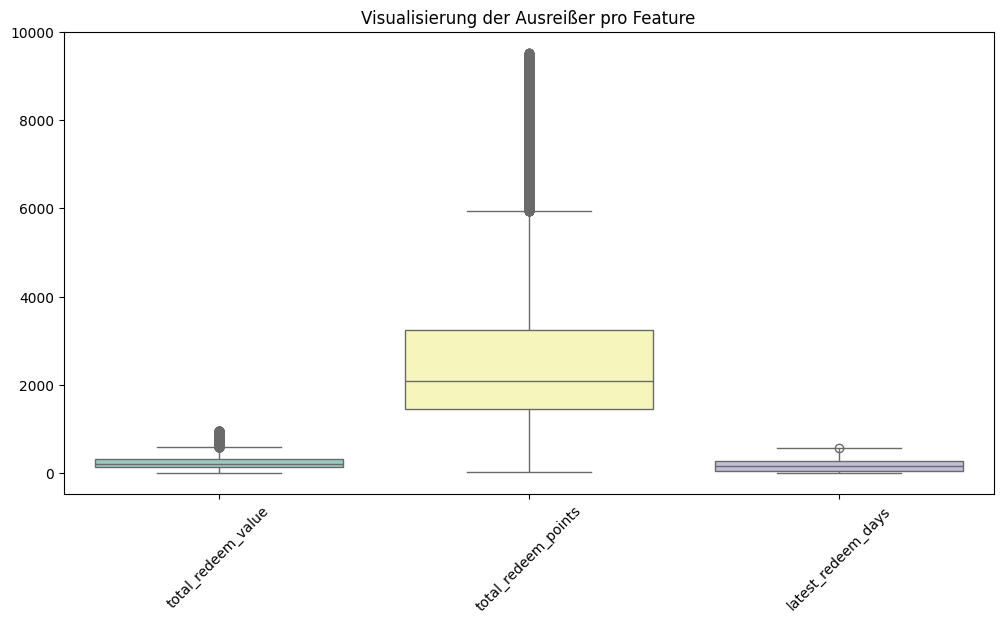

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstellt Boxplots für alle 3 Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=features, palette="Set3")
plt.title("Visualisierung der Ausreißer pro Feature")
plt.xticks(rotation=45)
plt.show()

Scaling the Features 

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

Check Number of Clusters

In [22]:
inertia = []
k_range = range(2, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

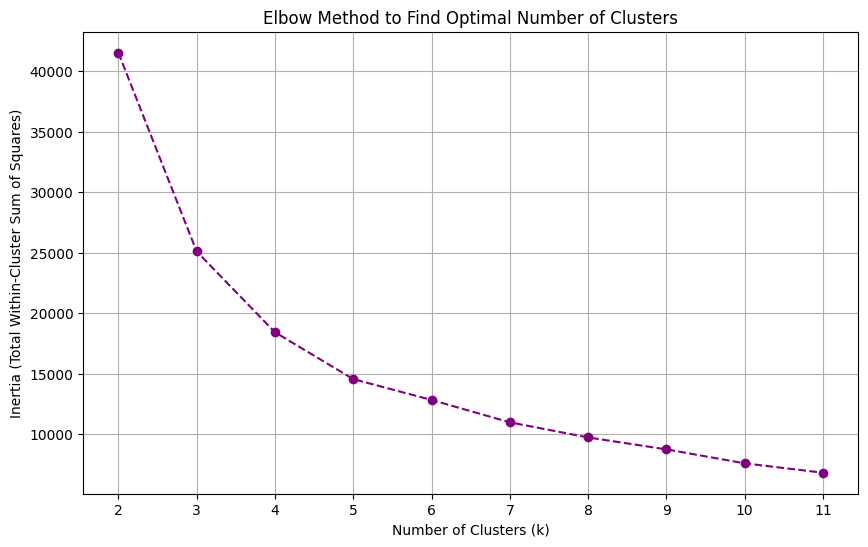

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Total Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

No of 5 Clusters Prediction

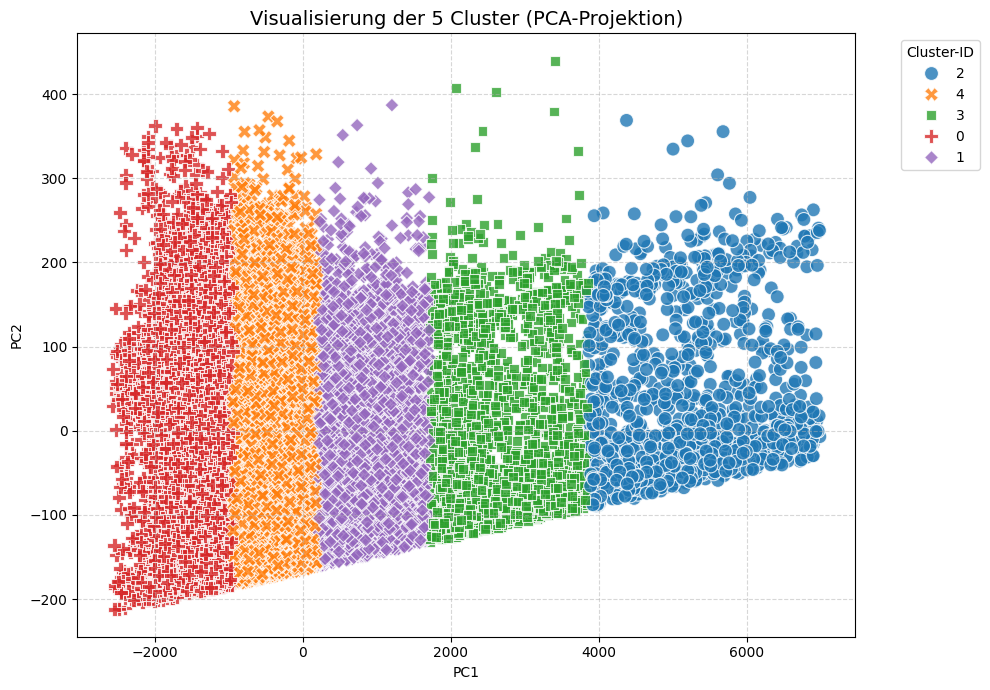

In [24]:
# 1. Cluster-Labels erstellen
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(features)

# 2. Visualisierung: 2D-Projektion via PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(features)

# Umwandlung in ein temporäres DataFrame
plot_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
plot_df['Cluster'] = clusters.astype(str)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='Cluster', 
    data=plot_df, 
    palette='tab10', 
    s=100, 
    style='Cluster', 
    alpha=0.8,
    edgecolor='w' # Weißer Rand um die Punkte für bessere Sichtbarkeit
)

plt.title("Visualisierung der 5 Cluster (PCA-Projektion)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Cluster-ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Falls Sie in einer IDE wie VS Code oder PyCharm arbeiten:
plt.show() 

# Falls Sie die Grafik für einen Bericht speichern wollen:
# plt.savefig('cluster_visualisierung.png', dpi=300)

--- Analyse zur Definition der Cluster ---
         total_redeem_value  total_redeem_points  latest_redeem_days  \
Cluster                                                                
0                114.810254          1148.102543          209.001156   
1                342.428169          3424.281693          140.536047   
2                769.543814          7695.438136          105.466949   
3                512.422837          5124.228372          108.428864   
4                212.226604          2122.266037          161.916398   

         Anzahl_Mitglieder  
Cluster                     
0                     8650  
1                     4938  
2                     1180  
3                     2439  
4                     8995  


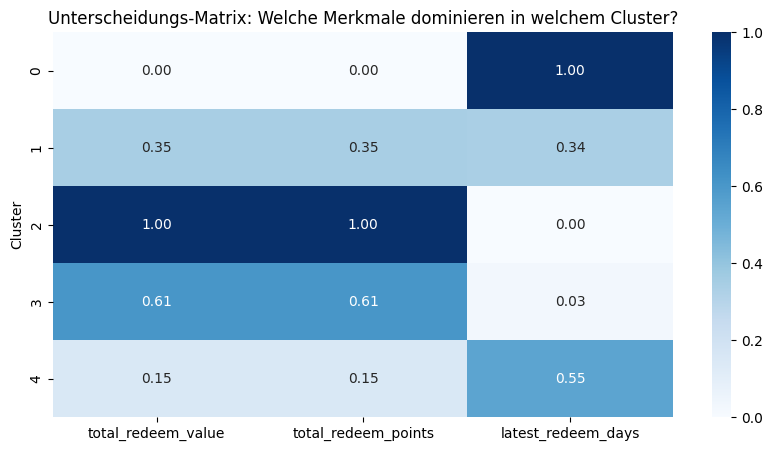

In [25]:
# add clusters to features
features['Cluster'] = clusters

# Calculate avrage value per cluster (Profiling)
cluster_summary = features.groupby('Cluster').mean()

# add number of member in each cluster
cluster_summary['Anzahl_Mitglieder'] = features.groupby('Cluster').size()

# Output of the table for defining clusters
print("--- Analyse zur Definition der Cluster ---")
print(cluster_summary)

#  (Heatmap)

plt.figure(figsize=(10, 5))
# Normalisierung (0 bis 1), damit man die Unterschiede sofort sieht
summary_normalized = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())
sns.heatmap(summary_normalized.drop(columns='Anzahl_Mitglieder'), annot=True, cmap='Blues', fmt='.2f')

plt.title("Unterscheidungs-Matrix: Welche Merkmale dominieren in welchem Cluster?")
plt.show()

Saving Models

In [26]:
#save the kmean model
joblib.dump(kmeans, 'kmeans_model.pkl')

#save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']